# GAN (Generative Adversarial Network) 生成对抗网络

## 1. Introduction

In 2014, Ian Goodfellow, a student of Yoshua Bengio at the University of Montreal, proposed the Generative Adversarial Network (GAN), which opened up the hottest research direction in deep learning.

2014年，Universite de Montreal 大学Yoshua Bengio（2018年图灵奖获得者）的学生Ian Goodfellow提出 生成对抗网络（Generative adj-terminal networks，简称 GAN），从而开辟了深度学习最赤手可热的研究方向。

The GAN is a generative model that can generate new data samples. It is composed of two neural networks, a generator and a discriminator. The generator is responsible for generating new data samples, and the discriminator is responsible for distinguishing between real data samples and fake data samples generated by the generator. The two networks are trained together, and the generator is trained to generate data samples that are difficult for the discriminator to distinguish from real data samples.

该方法利用了两个网络，一个称为生成网络，另一个称为鉴别网络，可用于以音频、视频和文本的形式产生不同寻常的创造性输出。生成网络的目标是生成看起来像真实数据的数据，而鉴别网络的目标是尽可能准确地区分真实数据和生成数据。

## 2. GAN Application Scenarios

- Graphic editing: Given an image, you can generate a variety of images based on it;

  - 图像编辑：给定一张图像，可以在该图像的基础之上生成各种各样的图像；

- Image generation: Generate images of people, animals, etc. that do not exist in reality;

  - 图像生成：生成现实中不存在的人、动物等图像；

- Malicious Attack Detection: Deep learning-generated models can be hacked, exploited, and even controlled by attackers. To counter such adversarial attacks, it is possible to train adversarial neural networks to generate more fake training data as hypothetical enemies. This allows the model to identify these fake data during exercises, making the model being classified more robust with the false data generated by GANs;

  - 恶意攻击检测：深度学习生成的模型是可以被黑客攻击，利用甚至控制的。为了对抗这样的逆向攻击（adversarial attacks），可以训练对抗神经网络去生成更多的虚假训练数据作为假想敌，让模型在演习中去识别出这些虚假数据，GAN生成的虚假数据让正在做分类的模型更加稳健；

- Data Generation: In fields like healthcare, the lack of training data is the biggest obstacle to applying deep learning. Traditional data augmentation techniques involve stretching, rotating, and cropping the original images, but these are still the original images. By using GANs, it's possible to generate even more similar data;

  - 数据生成：例如医疗领域，缺少训练数据是应用深度学习的最大障碍。数据增强的传统做法是将原图像拉伸旋转剪切，但这毕竟还是原来的图像，通过使用GAN，能够生成更多类似的数据；

- Attention Prediction: When humans look at a picture, they often focus on specific parts. GAN models can predict the areas of human interest within an image.

  - 注意力预测：人类在看一张图片时，往往只关注特定的部分，而通过GAN模型，可以预测出人类关心的区域在哪里。

- 3D Structure Generation: Pix2Vox is an open-source tool based on GANs that can generate corresponding three-dimensional structures from hand-drawn two-dimensional pictures. It generates not only the shape but also the corresponding colors. With such tools, the barrier to 3D modeling can be lowered, making 3D printing more accessible.

  - 三维结构生成：pix2vox是一个基于GAN的开源工具，能够根据手绘的二维图片，生成对应的三维结构，不止有对应的形状，还会生成对应的颜色，有了这样的工具，就能降低3D建模的门槛，从而让3D打印更容易的落地。

## 3. GAN Structure

GAN consists of two neural networks, a generator and a discriminator. The generator is responsible for generating new data samples, and the discriminator is responsible for distinguishing between real data samples and fake data samples generated by the generator. 

GAN包含：生成网络（Generator Network）和判别网络（Discriminator Network）,其中生成网络Gen负责学习样本的真实分布，判别网络Dis负责将对生成网络生成的样本和真实样本分别进行判别。

The two networks are trained together, and the generator is trained to generate data samples that are difficult for the discriminator to distinguish from real data samples.

两个网络是一起训练的，生成网络被训练成生成数据样本，使得判别网络很难区分真实数据样本和生成数据样本。

![](https://img-blog.csdnimg.cn/d373d16f67504d689779a43b2a31a09c.png)

### 3.1 Generator生成器

The generator is a neural network that generates new data samples. The input of the generator is a random noise (Random noise) or a control variable similar to the input of the discriminator. The generator generally uses a multi-layer neural network to implement, and its output is the generated sample, which is a fake image. Therefore, the samples and the real given samples are trained together to the discriminator model.

生成模型以随机噪声(Random noise)或者类似的控制变量作为输入，生成器一般使用多层的神经网络实现，其输出为生成的样本，也就是一张假的图片（fake image）；这样样本和真实给定的样本一起给判别器模型训练。

**Random noise噪声的作用**

The random noise is used to make the generated images more diverse. If the random noise is not added, the generator may only generate one image, and such images are not diverse and random.

一开始输入的噪声是为了让生成器生成的图片更加多样化，如果不加入噪声，生成器可能只会生成一张图片，这样的图片是没有多样性随机性的。

In [1]:


#对于生成器，输入的为正态分布随机数
#输出为: [1,28,28]图片
"""
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(in_features=100,out_features=256),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=256,out_features=512),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=512,out_features=784),
            torch.nn.Tanh()#对于生成器使用tanh激活函数更好
        )
    def forward(self,input):
        x = self.fc(input)
        img = x.view(-1,28,28)
        return img

"""

'\nclass Generator(torch.nn.Module):\n    def __init__(self):\n        super(Generator, self).__init__()\n        self.fc = torch.nn.Sequential(\n            torch.nn.Linear(in_features=100,out_features=256),\n            torch.nn.ReLU(),\n            torch.nn.Linear(in_features=256,out_features=512),\n            torch.nn.ReLU(),\n            torch.nn.Linear(in_features=512,out_features=784),\n            torch.nn.Tanh()#对于生成器使用tanh激活函数更好\n        )\n    def forward(self,input):\n        x = self.fc(input)\n        img = x.view(-1,28,28)\n        return img\n\n'

### 3.2 Discriminator 判别器

Discriminator is a binary classifier that discriminates whether a sample is a real sample or a sample generated by the generator. It is generally implemented using a neural network.

判别器模型是一个二分类器，判别一个样本是真实的样本还是生成器生成的样本，一般也是使用神经网络实现。

In [2]:

import torch
import numpy as np
 
#判别器的输入为一张图片
#输出为二分类的概率值
#判别器对log(1 - D(G(z)))的判别作为生成器的损失值
"""
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(in_features=784,out_features=512),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(in_features=512,out_features=256),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(in_features=256,out_features=1),
            torch.nn.Sigmoid()
        )
    def forward(self,input):
        x = input.view(-1,784)
        x = self.fc(x)
        return x
"""

'\nclass Discriminator(torch.nn.Module):\n    def __init__(self):\n        super(Discriminator, self).__init__()\n        self.fc = torch.nn.Sequential(\n            torch.nn.Linear(in_features=784,out_features=512),\n            torch.nn.LeakyReLU(),\n            torch.nn.Linear(in_features=512,out_features=256),\n            torch.nn.LeakyReLU(),\n            torch.nn.Linear(in_features=256,out_features=1),\n            torch.nn.Sigmoid()\n        )\n    def forward(self,input):\n        x = input.view(-1,784)\n        x = self.fc(x)\n        return x\n'

### 3.3 Training Process训练过程

- For the generator: the training goal is to make the generated data as similar as possible to the real data, and minimize the discrimination accuracy of the discriminator model.
- 对于生成模型：训练目标是让生成的数据尽可能的与真实数据相似，最小化判别模型的判别准确率。

- For the discriminator: the training goal is to maximize the discrimination accuracy, that is, to distinguish between real samples and samples generated by the generator.
- 对于判别模型：训练目标是最大化判别准确率，即区分样本是真实样本还是生成器生成的样本。

We could find that the process is contradictory, so:

可以发现，这个过程是矛盾的，因此：

- In the training process, the two networks are trained alternately, and each iteration is divided into two stages:
  - 在训练的过程中，两个网络交替训练，每一次迭代时分为两个阶段：

  - The first stage: first fix the discriminator model and optimize the generator model to make the generated data as similar as possible to the real data.
    - 第一个阶段：首先固定判别模型，优化生成模型，使得生成的数据尽可能的与真实数据相似。

  - The second stage: fix the generator model and optimize the discriminator model to improve the classification accuracy of the discriminator model.
    - 第二个阶段：固定生成模型，优化判别模型，提高判别模型的分类准确率。

Hint: in the training process, the generator tries to make the generated images more realistic, while the discriminator tries to identify the authenticity of the generated images, which is a process of mutual competition, mutual promotion, and continuous confrontation. 

提示：在训练过程中，生成器努力地让生成的图像更加的真实，而判别器则努力地识别生成器图片的真假，这是是一个相互博弈的过程，互相提升自己，也就是不断的进行对抗的过程。

As the training progresses, the samples generated by the generator and the real samples are almost indistinguishable, and the discriminator model cannot accurately distinguish the authenticity of a sample. At this time, the classification error rate is 0.5 ([Nash equilibrium](https://en.wikipedia.org/wiki/Nash_equilibrium)).

随着训练的进行，生成模型产生的样本和真实样本几乎没有什么差别，判别模型也无法准确的判别一个样本的真假，此时的分类错误率为0.5（[那什均衡](https://zh.wikipedia.org/wiki/%E7%BA%B3%E4%BB%80%E5%9D%87%E8%A1%A1)）

## 4. GAN Model Slelection GAN模型的选择

GAN is a framework for generative models, and it does not specify which specific model the generator and discriminator are. It can be a neural network model, a convolutional neural network model, or other machine learning models.

生成对抗网络是一个抽象的框架，并没有指定生成模型和判别模型具体为哪一种模型，可以是神经网络模型，也可以是卷积神经网络 模型或者其他的机器学习模型。

### 4.1 Generator Model 生成器模型

In this article, the generator model selection is a neural network model. Generate sample data such as images based on input variables such as type. The input received by the generator is a hidden variable such as a category and random noise, and the output is sample data similar to the training sample (such as images).

在本文中，生成器模型选择是神经网络模型。根据类型等输入变量来生成图像之类的样本数据，生成模型接收的输入是类别之类的隐变量和随机噪声，输出与训练样本相似的样本数据（比如图片之类的）。

Generator's goal is to learn the probability distribution $P_g$ from the training sample, assuming that the random noise variable z follows the probability distribution $P_g(z)$, then the generator model maps this random noise to the sample data space. The mapping function is as follows:

生成模型的目标是从训练样本学习到他们所服从的概率分布$P_g$，假设随机噪声变量z服从的概率分布为$P_g(z)$，则生成模型将这个随机噪声映射到样本数据空间。映射函数如下：

$$G(z;\theta_g)$$

The function $G(z;\theta_g)$ represents the generator model, where $z$ represents the input of the generator, and $\theta_g$ represents the parameters of the generator model, which are obtained through training.

其中$z$表示的生成模型的输入， $\theta_g$表示生成模型的参数，通过训练得到。

### 4.2 Discriminator Model 判别器模型

Discriminator Model usually is a binary classifier, which is generally implemented using a neural network model. The input of the discriminator is the sample data, and the output is the probability that the sample data is a real sample. The discriminator model is trained to maximize the probability of real samples and minimize the probability of fake samples.

判别模型一般用分类问题的神经网络，用于区分样本的真假（给定的真实数据和生成器生成的数据），是一个二分类问题。

The discriminator would mark as 1 when the sample is judged as real data, and mark as 0 when the sample is judged as data generated by the generator. The mapping function is as follows:

当这个样本被判别为真实数据时标记为1,判别来自生成器生成的数据时判别为0.其映射函数为:

$$G(x, \theta_d)$$

In the function $G(x, \theta_d)$, $x$ represents the input of the model, which is a real number between [0,1], which is the real sample data or the sample data generated by the generator; $\theta_d$ represents the parameters of the model, which are obtained through training.

其中，$x$表示模型的输入，是[0,1]之间的实数，是真实的样本数据或者生成器生成的样本;$\theta_d$表示模型的参数，也是通过训练得到。

## 5. GAN Loss Function GAN的损失函数

The loss function of the generator and the discriminator is different.

生成器和判别器的损失函数是不一样的。

### 5.1 Discriminator Loss Function 判别器的损失函数

The loss function of the discriminator is a binary cross-entropy loss function, which is used to measure the difference between the predicted value and the true value. It is relatively simple and has been introduced before.

判别器的损失函数是二分类交叉熵损失函数，用于衡量预测值和真实值之间的差异。比较简单，在之前也有介绍过。

### 5.2 Generator Loss Function 生成器的损失函数

The most critical part of the GAN network is the design of the loss function for the generator. The loss function of the generator is the reverse of the loss function of the discriminator.

GAN网络中的精妙之处就是对于生成器的损失函数的设计，生成器的损失函数是判别器的损失函数的反向。

The loss function of the generator is to maximize the probability that the sample data generated by the generator is judged as a real sample by the discriminator. 

生成器的损失函数是最大化生成器生成的样本数据被判别器判别为真实样本的概率。即尽可能"骗过"判别器。

## 6. GAN Algorithm Convergence 算法的收敛性 

Goodfellow et al. proved that the GAN algorithm can converge to the Nash equilibrium under certain conditions. The Nash equilibrium is a concept in game theory, which means that in a game, each player's strategy is the best response to the other player's strategy. Its formula is as follows:

Goodfellow等人证明了GAN算法在一定条件下可以收敛到纳什均衡。纳什均衡是博弈论中的一个概念，意味着在一个博弈中，每个玩家的策略都是对方策略的最佳响应。其公式如下：

$$\min_G \max_D V(D, G) = \mathbb{E}_{x \sim p_{data}(x)}[\log D(x)] + \mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))]$$

In the above formula, $V(D, G)$ represents the loss function of the generator and the discriminator, $p_{data}(x)$ represents the distribution of real data, and $p_z(z)$ represents the input noise distribution of the generator. $D(*)$ represents the probability that the D network judges the picture as true.

在以上公式中，$V(D, G)$表示生成器和判别器的损失函数，$p_{data}(x)$表示真实数据的分布，$p_z(z)$表示生成器的输入噪声分布。$D(*)$则代表D网络判断图片是否为真的概率。

Therefore, in the first half of the equation, $\mathbb{E}_{x \sim p_{data}(x)}[\log D(x)]$ represents the probability that the discriminator D judges the real picture, 

and the second half $\mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))]$ represents the probability that the discriminator D judges the generated picture.

因此，前半部分中，$\mathbb{E}_{x \sim p_{data}(x)}[\log D(x)]$代表的是判别器D判别出真实图片的概率，后半部分$\mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))]$代表的是判别器D判别出生成图片的概率。

**核心：对抗**

For Generator, its goal is to maximize the probability that the discriminator D judges the generated picture as a real picture, that is, to minimize $\log(1 - D(G(z)))$; while for the discriminator D, its goal is to maximize the probability that the discriminator D judges the generated picture, that is, to maximize $\log(1 - D(G(z)))$.

对于生成器G，它的目标是最大化判别器D判别生成图片的概率，即尽可能让$D(G(z))=1$,即最小化$\log(1 - D(G(z)))$，而对于判别器D，它的目标是最大化判别生成图片的概率，即最大化$\log(1 - D(G(z)))$。

So here comes the contradiction, or so-called 'adversarial process', the generator G tries to make the generated picture more real, while the discriminator D tries to identify the authenticity of the generated picture.

这样就形成了一个对抗的过程，生成器G努力地让生成的图片更加真实，而判别器D努力地识别生成器图片的真假。

Therefore the goal of the generator is to minimize the loss function, and the goal of the discriminator is to maximize the loss function. Therefore, the goal function is also a minimax problem:

因此目标函数也就变成了一个最小最大问题：
$\min_G \max_D V(D, G)$

## 7.Case Study: GAN for Image Generation(MNIST) 案例：GAN用于图像生成(1)

In [3]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
import torch.nn.functional as F

In [4]:
torch.__version__

'2.1.0'

#### 数据准备 Data Preparation

In the GAN model, the data is generally normalized to [-1,1], which is more conducive to the training of the generator.

在GAN网络中，一般推荐在数据准备阶段将数据归一化至[-1,1]之间，这样有利于生成器的训练。

In [5]:
#数据归一化处理至[-1,1]
transform = transforms.Compose([
    #Totensor function is to convert the image to [1,28,28] format and normalize the pixel value to [0,1]
    #这里的ToTensor是将图片中存在的[0,255]的值转换到[0,1]之间,并将图片转换为[1,28,28]的格式
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [6]:
#加载torch.vision中的mnist数据集
train_dataset = torchvision.datasets.MNIST(
    root = './Data',
    train=True,
    transform = transform,
    download=True
)


In [7]:
#加载数据集
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

In [8]:
imgs, _ = next(iter(dataloader))

In [9]:
imgs.shape

torch.Size([64, 1, 28, 28])

#### 定义生成器 Define Generator

In [10]:
#生成器 的输入是长度为100的随机向量（噪声）
# The input of the generator is a random vector (noise) of length 100
#输出是一个（1,28,28）的图片
# Linear 1第一个线性层是从100维的噪声到256维的向量
# Linear 2第二个线性层是从256维的向量到512维的向量
# Linear 3第三个线性层是从512维的向量到28*28=784维的向量
# 最后需要一个reshape操作将784维的向量转换为28*28的图片

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Tanh()
        )

    def forward(self, input): #input是长度为100的随机向量（噪声输入）
        x = self.main(input)
        img = x.view(-1, 28, 28, 1) #reshape操作将784维的向量转换为28*28的图片
        return img


#### 定义判别器 Define Discriminator

In [11]:
#判别器的输入是一张(1, 28, 28)图片,输出是一个二分类的（0， 1）概率值，输出使用sigmoid激活函数
# 判别器的处理方法相当于logistic回归
# BCELoss是二分类交叉熵损失函数,用于计算交叉熵损失


In [12]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, input):
        x = input.view(-1, 28*28)
        return self.main(x)

#### Initialize Model, Optimizer and Loss Function 初始化模型、优化器及损失函数 

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
gen = Generator().to(device)
dis = Discriminator().to(device)

In [15]:
#定义优化器

dis_optim = torch.optim.Adam(dis.parameters(), lr=0.0001)
gen_optim = torch.optim.Adam(gen.parameters(), lr=0.0001)

In [23]:
# 定义损失计算函数
# BCELOSS就是二分类交叉熵损失函数binanry cross entropy loss
loss_fn = torch.nn.BCELoss()

#### 绘图函数 Plot Function

In [29]:
def gen_img_plot(model, test_input):
    #这一步，将生成器的输出转换为图片
    prediction = np.squeeze(model(test_input).detach().cpu().numpy())
    fig = plt.figure(figsize=(4, 4))
    for i in range(prediction.shape[0]):
        plt.subplot(4, 4, i+1)
        #imshow函数接受的数值要么是[0,1]浮点数，要么是[0,255]RGB元组
        plt.imshow((prediction[i]+1)/2)
        plt.axis('off')
    plt.show()

In [25]:
test_input = torch.randn(16, 100, device = device)

#### GAN Training Process GAN的训练过程 

In [32]:
#存放生成器和判别器的损失值
G_loss = []
D_loss = []


Epoch: 0 D loss: 0.5473975401316116 G loss: 2.8703148621740118


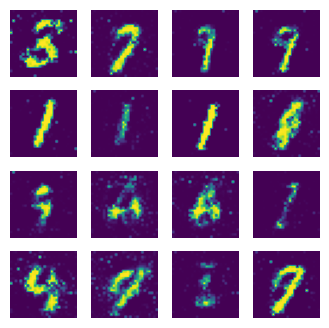

Epoch: 1 D loss: 0.5648648086260123 G loss: 2.862697055344897


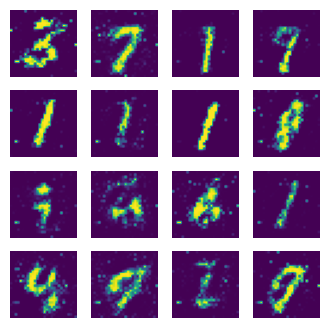

Epoch: 2 D loss: 0.598988093070384 G loss: 2.741176885455402


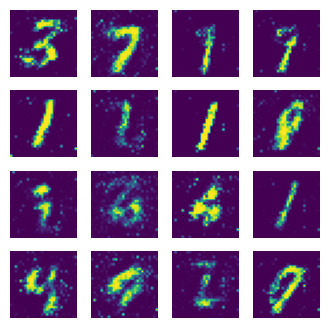

Epoch: 3 D loss: 0.617987915301628 G loss: 2.625951386336833


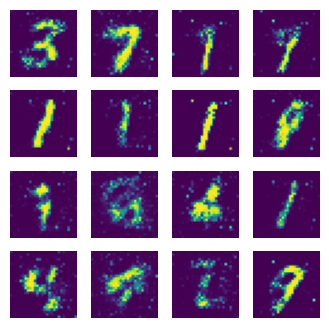

Epoch: 4 D loss: 0.6145685386301866 G loss: 2.563609159323198


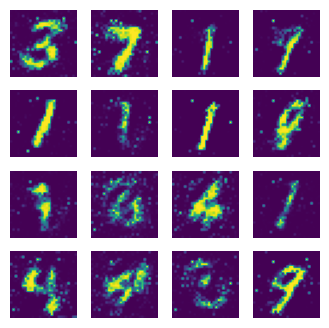

Epoch: 5 D loss: 0.6395687992765959 G loss: 2.5360671926154765


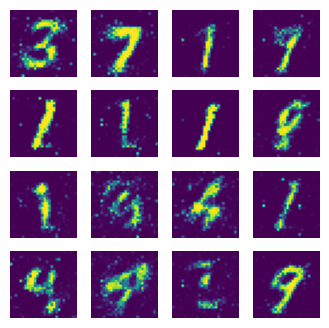

Epoch: 6 D loss: 0.6125301446741832 G loss: 2.573418655629351


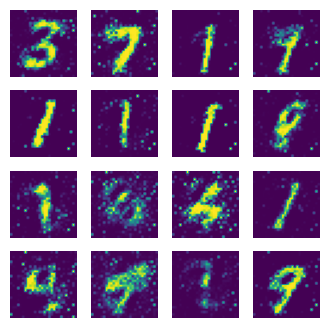

Epoch: 7 D loss: 0.6338198571316978 G loss: 2.5651399788063474


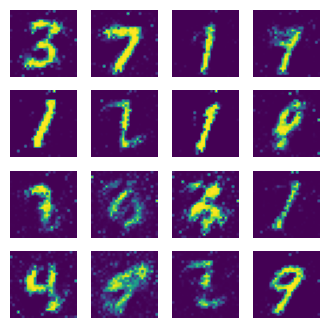

Epoch: 8 D loss: 0.6453089327700356 G loss: 2.4422170341904486


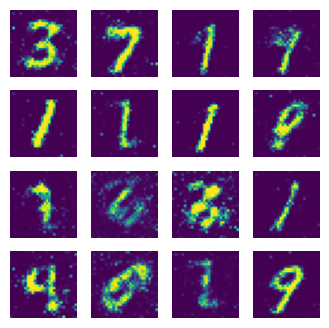

Epoch: 9 D loss: 0.6635440449152928 G loss: 2.3947006891022866


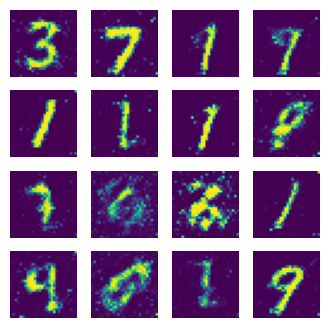

Epoch: 10 D loss: 0.6705161210125697 G loss: 2.363241216775451


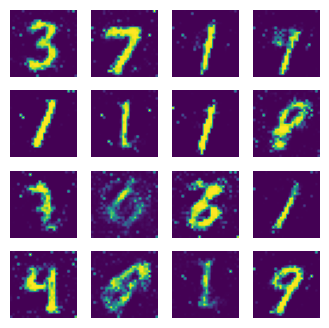

Epoch: 11 D loss: 0.6377794095702263 G loss: 2.5080153867125765


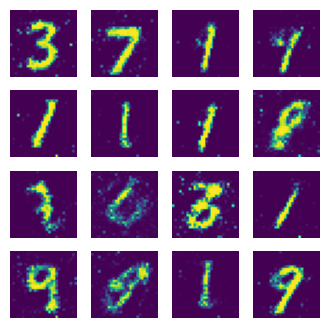

Epoch: 12 D loss: 0.6708868165006007 G loss: 2.3643924443960698


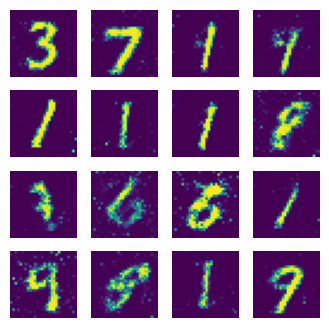

Epoch: 13 D loss: 0.6970178769595587 G loss: 2.2728369443147165


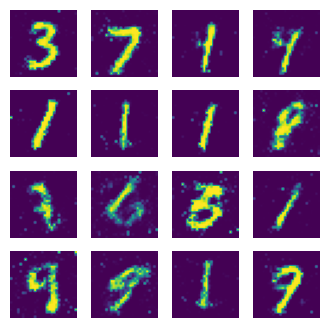

Epoch: 14 D loss: 0.7057954434837613 G loss: 2.231963075173181


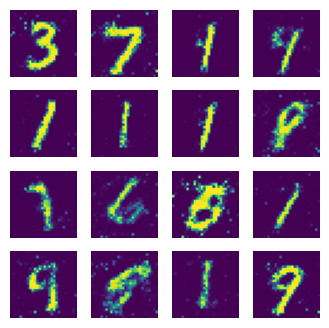

Epoch: 15 D loss: 0.7001665744509524 G loss: 2.2624240564639124


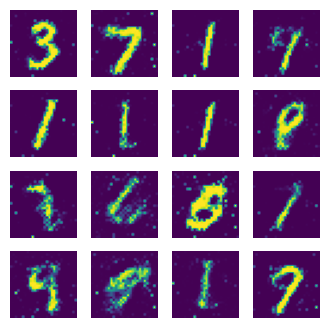

Epoch: 16 D loss: 0.6942770543065406 G loss: 2.329020831757771


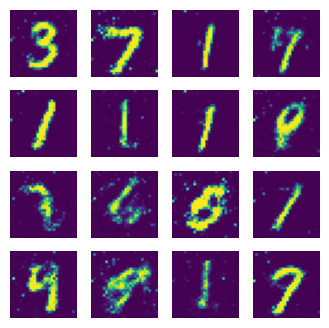

Epoch: 17 D loss: 0.7016724943161519 G loss: 2.2421398622903235


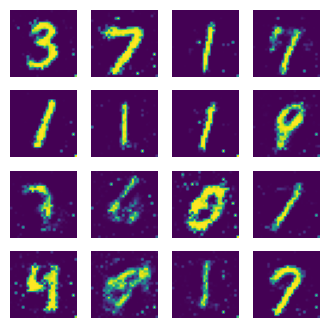

Epoch: 18 D loss: 0.6804258563815911 G loss: 2.2769709474750672


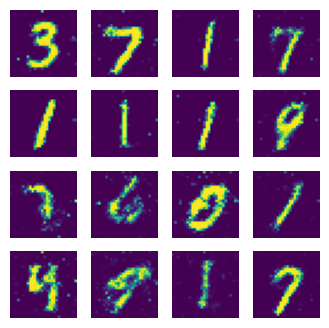

Epoch: 19 D loss: 0.7039708052235626 G loss: 2.205794207449915


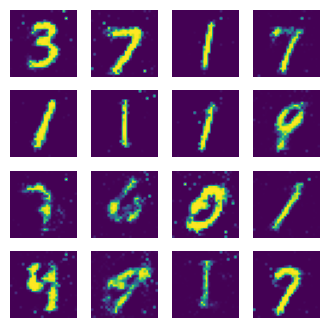

Epoch: 20 D loss: 0.7127157849734271 G loss: 2.171389950109697


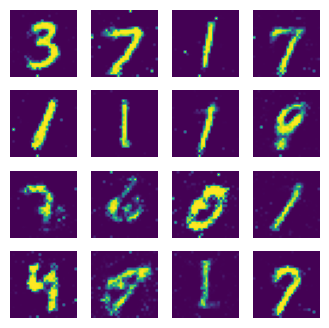

Epoch: 21 D loss: 0.7246165302262377 G loss: 2.1263431999474953


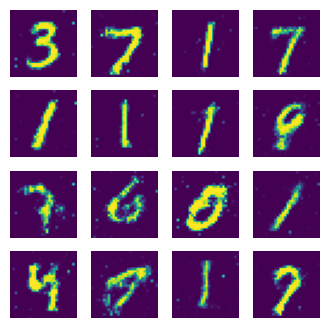

Epoch: 22 D loss: 0.7366143837412283 G loss: 2.0792966538400792


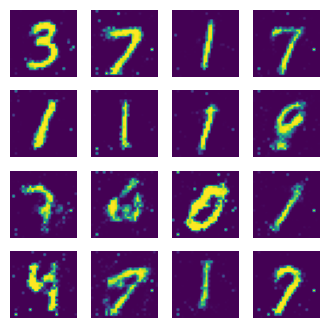

Epoch: 23 D loss: 0.7474468441914394 G loss: 2.1017852241296504


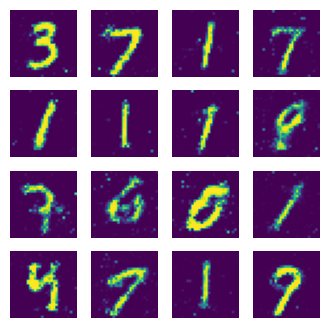

Epoch: 24 D loss: 0.7405465943282092 G loss: 2.129412102546773


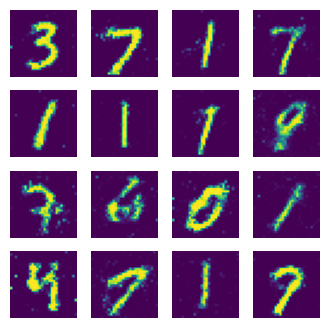

Epoch: 25 D loss: 0.7498599371549163 G loss: 2.089150158581195


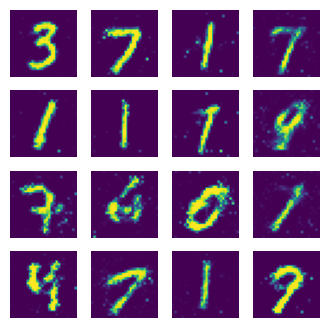

Epoch: 26 D loss: 0.7833221133456809 G loss: 2.0447924325206897


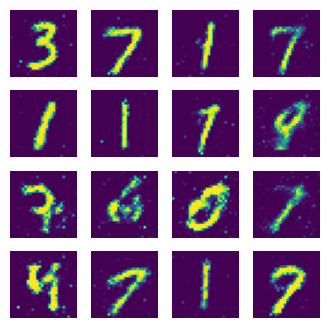

Epoch: 27 D loss: 0.7902427872360896 G loss: 1.9328228806508885


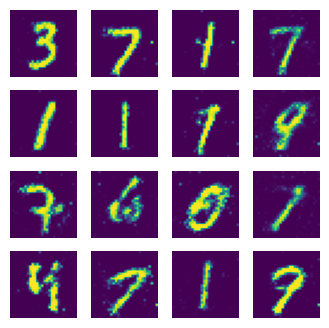

Epoch: 28 D loss: 0.7939858923016835 G loss: 1.9025354800956336


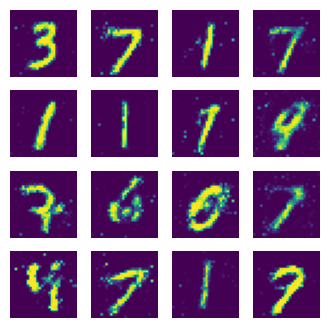

Epoch: 29 D loss: 0.7941210059913745 G loss: 1.9620109438133646


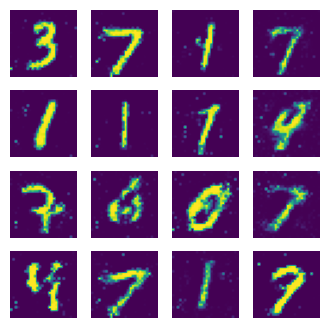

Epoch: 30 D loss: 0.8010945696312227 G loss: 1.9433196680123872


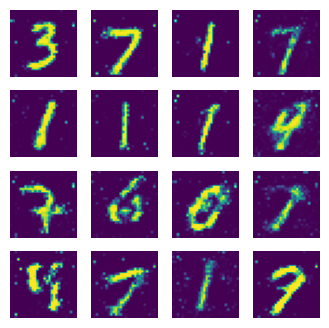

Epoch: 31 D loss: 0.8033970572165589 G loss: 1.9636884956980056


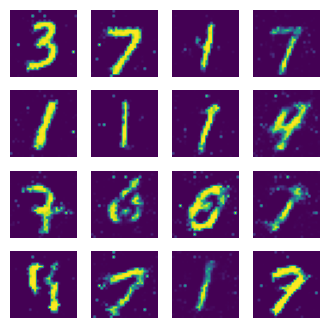

Epoch: 32 D loss: 0.7933932294977754 G loss: 1.9478302573852702


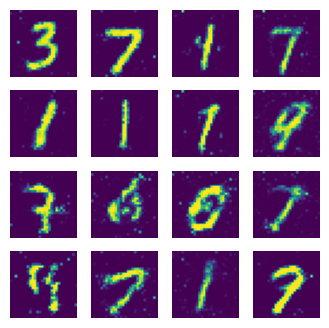

Epoch: 33 D loss: 0.805220301090273 G loss: 1.9429975830034407


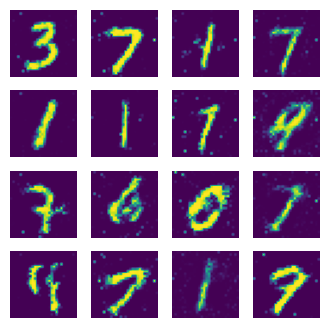

Epoch: 34 D loss: 0.7966333193692572 G loss: 1.9742690183714764


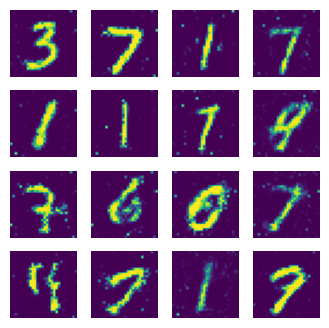

Epoch: 35 D loss: 0.7994309063278028 G loss: 1.946249819322944


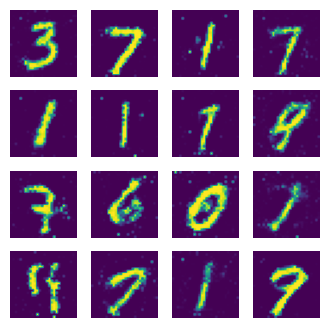

Epoch: 36 D loss: 0.8173230872479583 G loss: 1.8958795849702506


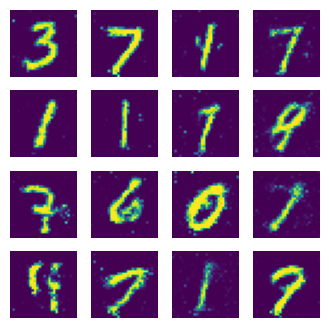

Epoch: 37 D loss: 0.8349251283257246 G loss: 1.8271145308449832


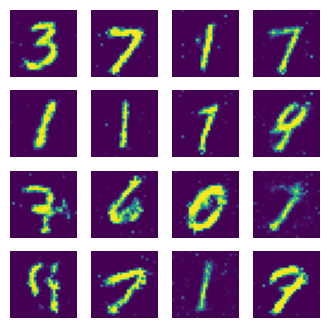

Epoch: 38 D loss: 0.8435879768148414 G loss: 1.7997594595845066


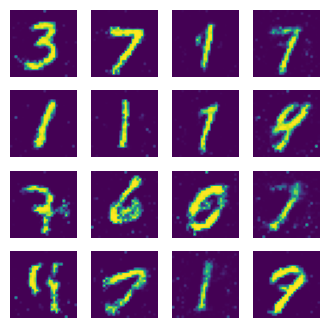

Epoch: 39 D loss: 0.8442146018115696 G loss: 1.8093540563639292


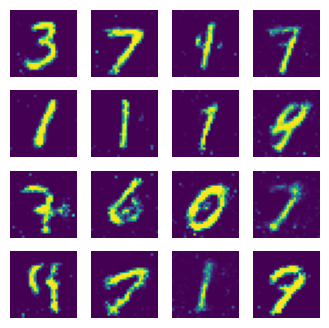

In [34]:
#训练循环
# training iteration
for epoch in range(40):
    d_epoch_loss = 0
    g_epoch_loss = 0
    count = len(dataloader)#返回dataloader的长度，即为batch的个数
    for step, (img, _) in enumerate(dataloader):
        img = img.to(device)
        size = img.size(0)
        random_noise = torch.randn(size, 100, device = device)

        #训练判别器
        # train the discriminator
        dis_optim.zero_grad()
            #对判别器输入真实图片，real_output为真实图片的判别结果
        real_output = dis(img)  
            #得到判别器在真实图片上的损失
        dis_real_loss = loss_fn(real_output, 
                                      torch.ones_like(real_output))
        dis_real_loss.backward()

        gen_img = gen(random_noise) #生成器生成假图片
            #对判别器输入生成的图片，fake_output为假图片的判别结果
        fake_output = dis(gen_img.detach()) 
            #得到判别器在生成图片上的损失
        dis_fake_loss = loss_fn(fake_output, 
                                      torch.zeros_like(fake_output))
        dis_fake_loss.backward()
        #判别器的总损失
        dis_loss = dis_real_loss + dis_fake_loss
        dis_optim.step()


        #训练生成器
        # train the generator
        gen_optim.zero_grad()
        fake_output = dis(gen_img)
            #生成器的损失
        gen_loss = loss_fn(fake_output, 
                                 torch.ones_like(fake_output))
        gen_loss.backward()
        gen_optim.step()

        with torch.no_grad():
            d_epoch_loss += dis_loss.item()
            g_epoch_loss += gen_loss.item()

    with torch.no_grad():
        d_epoch_loss /= count
        g_epoch_loss /= count
        D_loss.append(d_epoch_loss)
        G_loss.append(g_epoch_loss)
        print("Epoch:", epoch, "D loss:", d_epoch_loss, "G loss:", g_epoch_loss)
        gen_img_plot(model=gen, test_input=test_input)
